**Importing Packages**

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.model_selection import KFold, cross_val_score
from statistics import mode
import joblib

 
%matplotlib inline

**Load the DataSet**

In [2]:
train_data=pd.read_csv("Training.csv").dropna(axis=1)
test_data=pd.read_csv("Testing.csv").dropna(axis=1)

test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection(Dermatologist)
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy(Allergist)
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD(Gastroenterologist)
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis(Hepatologist)
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction(Allergist)
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae(Gastroenterologists)
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes(Diabetologist)
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis(Gastroenterologist)
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma(Pulmonologist)


**Count of Different Diseases**

<function matplotlib.pyplot.show(close=None, block=None)>

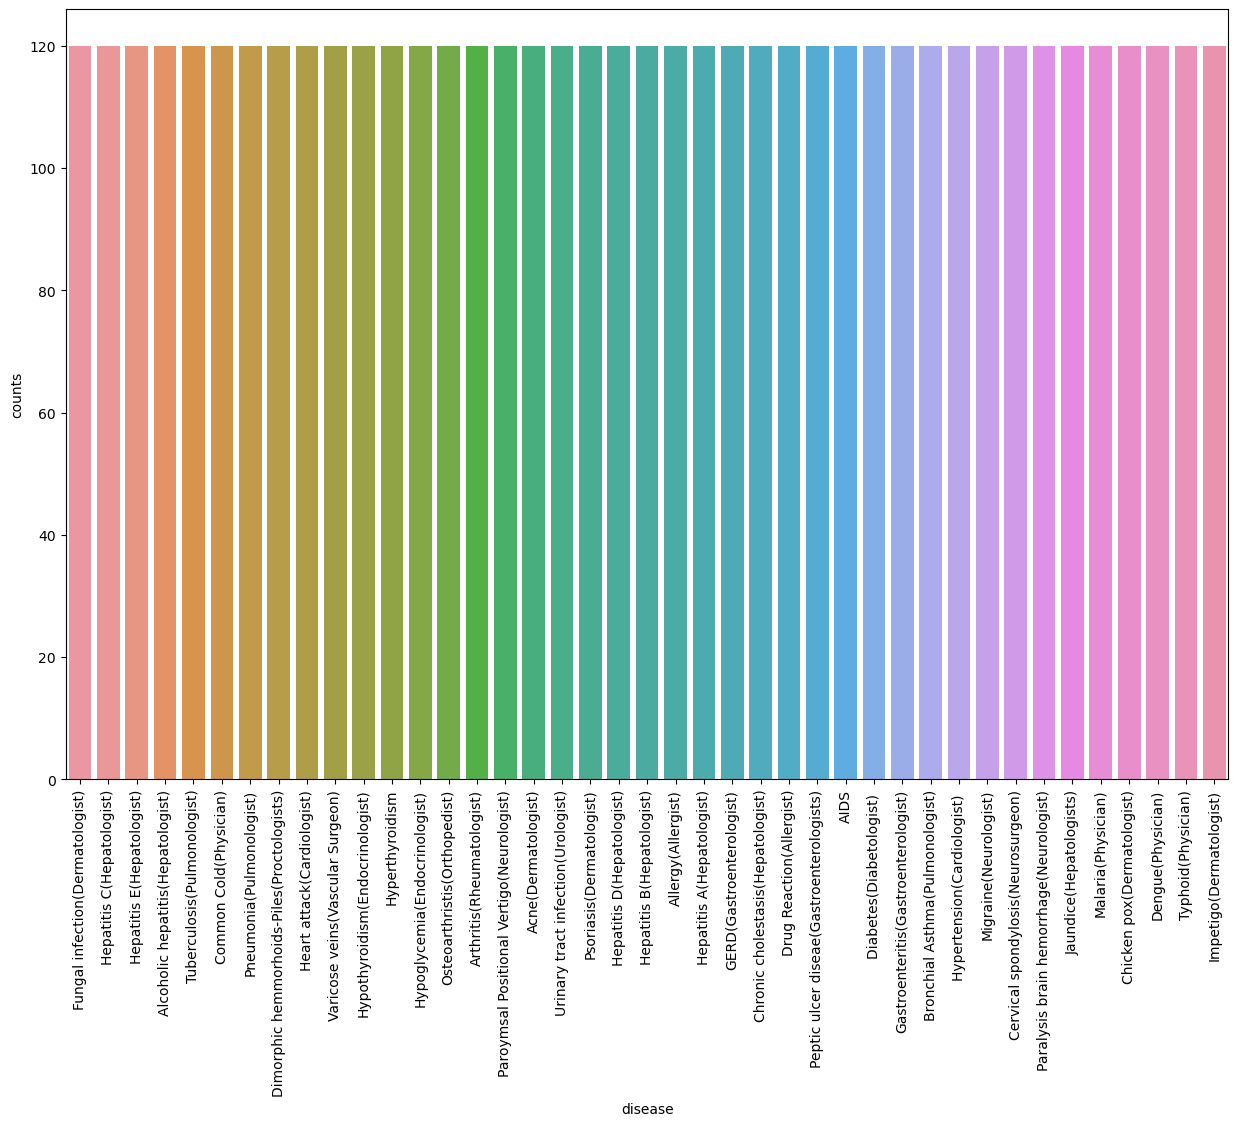

In [3]:
disase_counts=train_data['prognosis'].value_counts()
temp_dataframe=pd.DataFrame({
    'disease': disase_counts.index,
    'counts':disase_counts.values    
})

temp_dataframe
plt.figure(figsize=(15,10))
sns.barplot(x='disease',y='counts',data=temp_dataframe)
plt.xticks(rotation=90)
plt.show

**Preprocessing the Target Variable 'Prognosis' using Label Encoding**

In [4]:
encoder=LabelEncoder()
train_data['prognosis']=encoder.fit_transform(train_data['prognosis'])
test_data['prognosis']=encoder.fit_transform(test_data['prognosis'])
train_data
test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,15
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


**Split the Data into Training and Test Sets**

In [5]:
x=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

**K-Fold Cross-Validation Model**

In [6]:
def cv_scoring(estimator,x,y):
    return accuracy_score(y, estimator.predict(x))

models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18),
}


for model_name in models:
    model = models[model_name]
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, x, y, cv=kfold, scoring=cv_scoring, n_jobs=-1)
    print("==" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


**Support Vector Machine (SVM) Classifier**

Accuracy on test data by SVM Classifier: 100.0


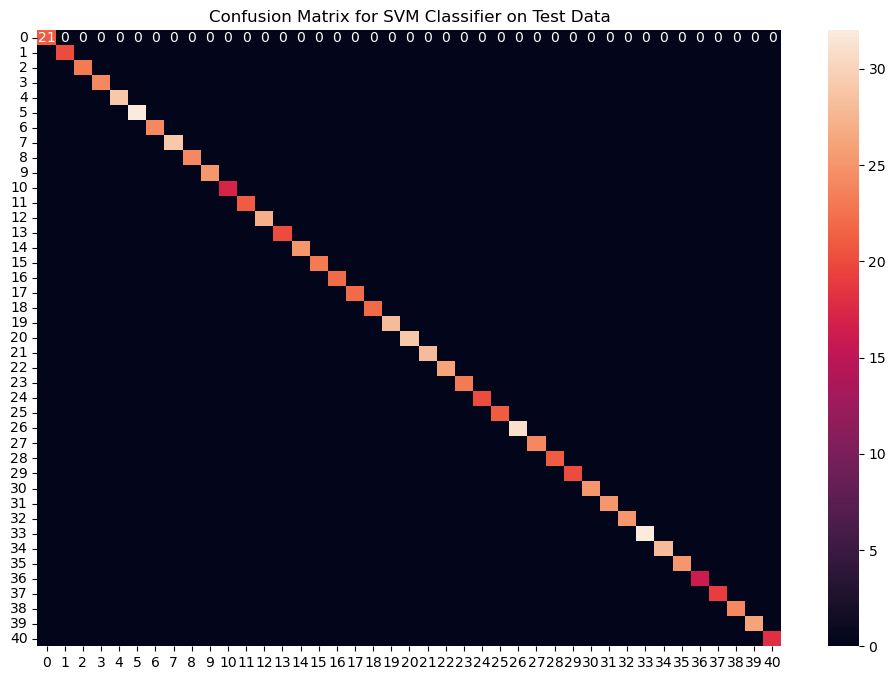

In [7]:
svmModel=SVC()
svmModel.fit(x_train,y_train)
preds=svmModel.predict(x_test)

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")


cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

**Naive Bayes Classifier**

Accuracy on train data by Naive Bayes Classifier: 100.0


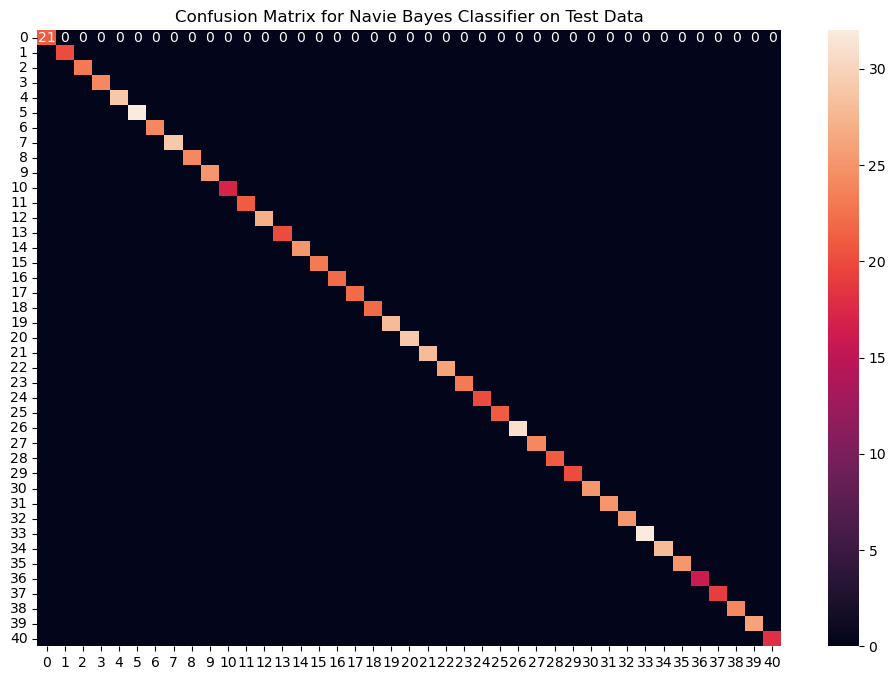

In [8]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nbModelPredict=nb_model.predict(x_test)

print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(x_train))*100}")

cf_matrix=confusion_matrix(y_test, nbModelPredict)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Navie Bayes Classifier on Test Data")
plt.show()

**Random Forest Calssifier**

Accuracy on test data by Random Forest Classifier: 100.0


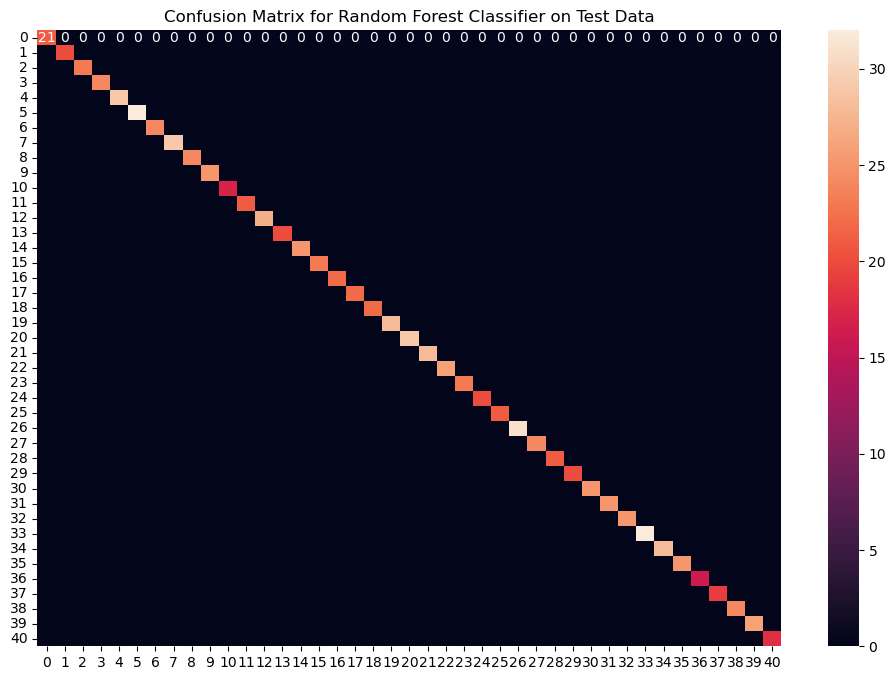

In [9]:
randomForestModel=RandomForestClassifier(random_state=18)
randomForestModel.fit(x_train,y_train)
randomForestModelPredict=randomForestModel.predict(x_test)

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix=confusion_matrix(y_test, randomForestModelPredict)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

**Persiting Model**

In [23]:
svmModelFit = SVC()
nbModelFit = GaussianNB()
rfModelFit = RandomForestClassifier(random_state=18)

svmModelFit.fit(x, y)
nbModelFit.fit(x, y)
rfModelFit.fit(x, y)

joblib.dump(svmModelFit,'svmModel.joblib')
joblib.dump(nbModelFit,'nbModel.joblib')
joblib.dump(rfModelFit,'rfModel.joblib')

['rfModel.joblib']

**Combining the Result of the Model and Testing the Accuracy**

Accuracy on Test dataset by the combined model: 100.0


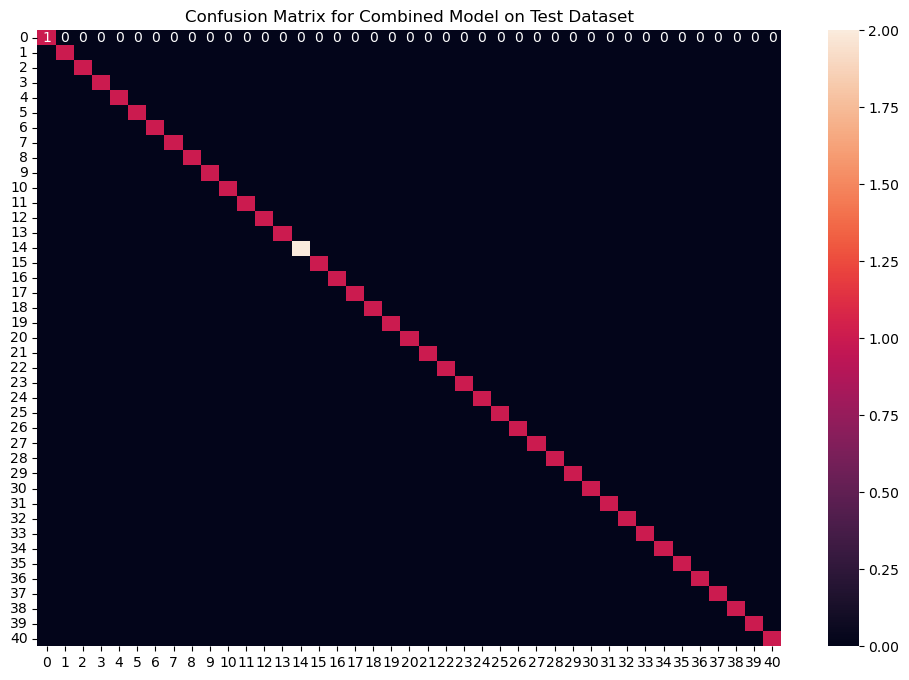

In [24]:

test_x = test_data.iloc[:, :-1]
test_y = test_data.iloc[:, -1]

svmModelFit=joblib.load('svmModel.joblib')
nbModelFit=joblib.load('nbModel.joblib')
rfModelFit=joblib.load('rfModel.joblib')

svmPredicts = svmModelFit.predict(test_x)
nbModelPredicts = nbModelFit.predict(test_x)
rfModelPredicts = rfModelFit.predict(test_x)


def safe_mode(lst):
    try:
        return mode(lst)
    except:
        return max(set(lst), key=lst.count)

final_preds = [safe_mode([i, j, k]) for i, j, k in zip(svmPredicts, nbModelPredicts, rfModelPredicts)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

**Seperate Prediction and Specialization**

In [25]:
import re

def separate_specialization(sentence):

    pattern = r'(.+?)\((.*?)\)'
    
    match = re.match(pattern, sentence)
    
    if match:
        # Extract the parts of the sentence
        before_bracket = match.group(1).strip()
        inside_bracket = match.group(2).strip()
        
        result = {
            "prediction": before_bracket,
            "specialization": inside_bracket
        }
        
        return result
    else:
        return None

**Predict Disease based on given Symptoms**

In [27]:
symptoms = x.columns.values

# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}


def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		

	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][rfModelFit.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][nbModelFit.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][svmModelFit.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	return predictions

# Testing the function
test_symptoms = "Polyuria,Increased Appetite,Excessive Hunger,Obesity"
test_predictions = predictDisease(test_symptoms)
print(test_predictions)
result = separate_specialization(test_predictions["final_prediction"])
print(result)
warnings.filterwarnings("ignore", category=UserWarning)

{'rf_model_prediction': 'Diabetes(Diabetologist) ', 'naive_bayes_prediction': 'Diabetes(Diabetologist) ', 'svm_model_prediction': 'Diabetes(Diabetologist) ', 'final_prediction': 'Diabetes(Diabetologist) '}
{'prediction': 'Diabetes', 'specialization': 'Diabetologist'}
